#### DA6213
#### Exercise #2
#### Name: ___Dan Schumacher___

__Having talked about privacy and big data, let’s see how US adult consumers feel about it.  This exercise utilizes the 2015 National Consumer Survey.  The data is available in Excel, SPSS and SAS formats.  You should be able to get at it from one of these forms and move it to whatever platform you want.  Here are the instructions for this exercise.__

___imports___

In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

# my own functions
from functions.home_brew import (
    evaluate,
    diagnostic_plots,
    calculate_vif,
    remove_high_vif_features,
    plot_sensitivity_specificity,
    aic_scorer,
    select_model_by_aic,
    calculate_cooks_distance,
    logistic_regression_diagnostic_plots,
    view_logistic_regression_coefficients
)

___Load and peek at data___

In [52]:
privacy_df = pd.read_excel('./data/privacy.xlsx')

In [53]:
privacy_df.shape

(25439, 4)

In [54]:
privacy_df.columns

Index(['commodity', 'like_know', 'classic_coke', 'gender'], dtype='object')

In [55]:
privacy_df.head(1)

,commodity,like_know,classic_coke,gender
0,1.0,4.0,0,0


In [56]:
privacy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25439 entries, 0 to 25438
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   commodity     23747 non-null  float64
 1   like_know     23752 non-null  float64
 2   classic_coke  25439 non-null  int64  
 3   gender        25439 non-null  int64  
dtypes: float64(2), int64(2)
memory usage: 795.1 KB


### 1.	Create a bar graph that displays the data for the variable commodity – this variable represents how consumers feel about their willingness to provide personal data for something of value.  What does the bar graph tell you in general?

- This Bar graph shows us that most people have a mid to high willingness to provide their personal data in exchange for something of value. (Most frequent are commodity rating 3 and 4)

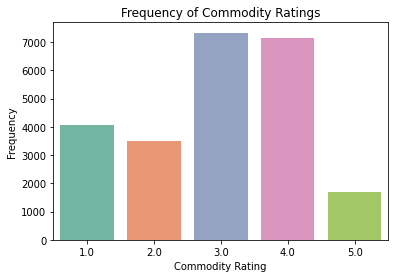

In [57]:
sns.countplot(x='commodity',data=privacy_df, palette='Set2')
plt.title('Frequency of Commodity Ratings')
plt.xlabel('Commodity Rating')
plt.ylabel('Frequency')
plt.show()

### 2.	Create a bar graph that displays the data for the variable like_know – this variable represents the extent to which consumers would like to know how their data is being used.  What does the bar graph tell you in general?

- This graph shows us that most everyone wants to know how their data is being used. Very few people (1s and 2s) don't seem to mind very much.

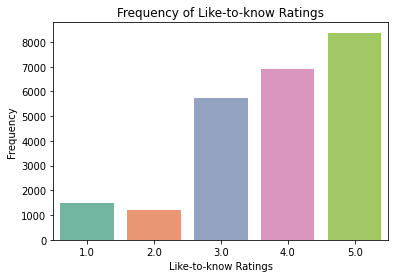

In [58]:
sns.countplot(x='like_know',data=privacy_df, palette='Set2')
plt.title('Frequency of Like-to-know Ratings')
plt.xlabel('Like-to-know Ratings')
plt.ylabel('Frequency')
plt.show()

### 3.	Perform the appropriate statistical test to see whether or not men and women differ in terms of how they feel about exchanging their personal data for something of value.  Interpret what you found – be sure to comment on the magnitude of any differences you find.


##### __check for normality__

In [70]:
privacy_df = privacy_df.dropna()

In [65]:
women = privacy_df[privacy_df['gender'] == 0]['commodity']
men = privacy_df[privacy_df['gender'] == 1]['commodity']

In [71]:
# Shapiro-Wilk Test: MEN
print('NULL: data comes from normaly distribution')

stat, p = stats.shapiro(men)
print(f'Statistics={stat}, p={p}')


# Interpret
alpha = 0.05
if p > alpha:
    print('fail to reject H0: continue assuming normality')
else:
    print('reject H0: continue assuming non-normality')

NULL: data comes from normaly distribution
Statistics=0.8930721879005432, p=0.0
reject H0: continue assuming non-normality


In [72]:
# Shapiro-Wilk Test: WOMEN

print('NULL: data comes from normaly distribution')

stat, p = stats.shapiro(women)
print(f'Statistics={stat}.3f, p={p}.3f')

# Interpret
alpha = 0.05
if p > alpha:
    print('fail to reject H0: continue assuming normality')
else:
    print('reject H0: continue assuming non-normality')

NULL: data comes from normaly distribution
Statistics=0.8955949544906616.3f, p=0.0.3f
reject H0: continue assuming non-normality


##### run t-test

In [73]:
from scipy.stats import ttest_ind

# Null
print('NULL: the means of two male and female samples are equal.')

# Perform t-test
t_statistic, p_value = ttest_ind(men, women)

# Print results
alpha = .05
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

if p < alpha:
    print('Reject Null: The two means are not equal')
else:
    print('Cannot reject Null')

NULL: the means of two male and female samples are equal.
T-Statistic: 4.9532180488345094
P-Value: 7.350213466363999e-07
Reject Null: The two means are not equal


#### determine magnitude

In [79]:
mean_diff = np.mean(men) - np.mean(women)
pooled_std = np.sqrt((np.var(men) + np.var(women)) / 2)
cohens_d = mean_diff / pooled_std

print("Cohen's d:", cohens_d)

Cohen's d: 0.06512535199950813


In [68]:
len(privacy_df)

23517

### 4.	Perform the appropriate statistical test to see whether or not people who drink coca cola differ in terms of how they feel about knowing how their data is being used.    Interpret what you found – be sure to comment on the magnitude of any differences you find.

In [80]:
coke = privacy_df[privacy_df['classic_coke'] == 1]
no_coke = coke = privacy_df[privacy_df['classic_coke'] == 0]

In [84]:
# Null
print('NULL: the means of the coke and non-coke samples are equal.')

# Perform t-test
t_statistic, p_value = ttest_ind(coke, no_coke)

# Print results
alpha = .05
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

if p < alpha:
    print('Reject Null: The two means are not equal')
else:
    print('Cannot reject Null')

NULL: the means of the coke and non-coke samples are equal.
T-Statistic: [ 0.  0. nan  0.]
P-Value: [ 1.  1. nan  1.]
Reject Null: The two means are not equal
